In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import regex as re
import warnings
warnings.filterwarnings('ignore')

In [2]:
d1 = pd.read_excel('Audible_Catlog.xlsx')
d2 = pd.read_excel('Audible_Catlog_Advanced_Features.xlsx')

In [3]:
d1

,Book Name,Author,Rating,Number of Reviews,Price
0,Think Like a Monk: The Secret of How to Harnes...,Jay Shetty,4.9,313.0,10080.0
1,Ikigai: The Japanese Secret to a Long and Happ...,Héctor García,4.6,3658.0,615.0
2,The Subtle Art of Not Giving a F*ck: A Counter...,Mark Manson,4.4,20174.0,10378.0
3,Atomic Habits: An Easy and Proven Way to Build...,James Clear,4.6,4614.0,888.0
4,Life's Amazing Secrets: How to Find Balance an...,Gaur Gopal Das,4.6,4302.0,1005.0
...,...,...,...,...,...
6363,The Hot Flash Club,Nancy Thayer,4.3,191.0,1131.0
6364,The Prophet & The Wanderer,Khalil Gibran,4.1,6.0,539.0
6365,Make Today Count: The Secret of Your Success I...,John C. Maxwell,4.7,301.0,500.0
6366,25 Hours a Day: Going One More to Get What You...,Nick Bare,4.7,285.0,501.0


In [4]:
d2

,Book Name,Author,Rating,Number of Reviews,Price,Description,Listening Time,Ranks and Genre
0,Think Like a Monk: The Secret of How to Harnes...,Jay Shetty,4.9,371.0,10080,"Over the past three years, Jay Shetty has beco...",10 hours and 54 minutes,",#1 in Audible Audiobooks & Originals (See Top..."
1,Ikigai: The Japanese Secret to a Long and Happ...,Héctor García,4.6,3682.0,615,Brought to you by Penguin.,3 hours and 23 minutes,",#2 in Audible Audiobooks & Originals (See Top..."
2,The Subtle Art of Not Giving a F*ck: A Counter...,Mark Manson,4.4,20306.0,10378,"In this generation-defining self-help guide, a...",5 hours and 17 minutes,",#3 in Audible Audiobooks & Originals (See Top..."
3,Atomic Habits: An Easy and Proven Way to Build...,James Clear,4.6,4678.0,888,Brought to you by Penguin.,5 hours and 35 minutes,",#5 in Audible Audiobooks & Originals (See Top..."
4,Life's Amazing Secrets: How to Find Balance an...,Gaur Gopal Das,4.6,4308.0,1005,"Stop going through life, Start growing throug...",6 hours and 25 minutes,",#6 in Audible Audiobooks & Originals (See Top..."
...,...,...,...,...,...,...,...,...
4459,"Factfulness: Wie wir lernen, die Welt so zu se...",Hans Rosling,4.6,72.0,703,"Sorry, we just need to make sure you're not a ...",-1,-1
4460,Late-Talking Children: A Symptom or a Stage?,Stephen M. Camarata,4.6,92.0,703,"Sorry, we just need to make sure you're not a ...",-1,-1
4461,"The Marketing of Evil: How Radicals, Elitists ...",David Kupelian,4.7,490.0,586,"Americans have come to tolerate, embrace, and ...",-1,-1
4462,Things I Wish I'd Known Before We Got Married,Gary Chapman,4.7,1388.0,516,\n\nOops!\nIt's rush hour and traffic is pilin...,-1,-1


In [5]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6368 entries, 0 to 6367
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Book Name          6368 non-null   object 
 1   Author             6368 non-null   object 
 2   Rating             6368 non-null   float64
 3   Number of Reviews  5737 non-null   float64
 4   Price              6365 non-null   float64
dtypes: float64(3), object(2)
memory usage: 248.9+ KB


In [6]:
d2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4464 entries, 0 to 4463
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Book Name          4464 non-null   object 
 1   Author             4464 non-null   object 
 2   Rating             4464 non-null   float64
 3   Number of Reviews  4043 non-null   float64
 4   Price              4464 non-null   int64  
 5   Description        4457 non-null   object 
 6   Listening Time     4464 non-null   object 
 7   Ranks and Genre    4464 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 279.1+ KB


In [7]:
d1['Number of Reviews'].fillna(np.mean(d1['Number of Reviews']),inplace=True)
d1['Price'].fillna(np.mean(d1['Price']),inplace=True)

In [8]:
d2['Number of Reviews'].fillna(np.mean(d2['Number of Reviews']),inplace=True)
d2['Price'].fillna(np.mean(d2['Price']),inplace=True)

In [9]:
d2['Description'].fillna('No Description',inplace=True)

In [10]:
d1['Rating'].replace(-1,np.mean(d1['Rating']),inplace=True)
d2['Rating'].replace(-1,np.mean(d2['Rating']),inplace=True)

In [11]:
d2['Listening Time']

0       10 hours and 54 minutes
1        3 hours and 23 minutes
2        5 hours and 17 minutes
3        5 hours and 35 minutes
4        6 hours and 25 minutes
                 ...           
4459                         -1
4460                         -1
4461                         -1
4462                         -1
4463                         -1
Name: Listening Time, Length: 4464, dtype: object

In [12]:
d2['Listening Time'].replace(-1,"0 hours and 0 minutes",inplace=True)

In [13]:
d2['Description']

0       Over the past three years, Jay Shetty has beco...
1                              Brought to you by Penguin.
2       In this generation-defining self-help guide, a...
3                              Brought to you by Penguin.
4       Stop going through life,  Start growing throug...
                              ...                        
4459    Sorry, we just need to make sure you're not a ...
4460    Sorry, we just need to make sure you're not a ...
4461    Americans have come to tolerate, embrace, and ...
4462    \n\nOops!\nIt's rush hour and traffic is pilin...
4463    Disease care vs health care: Which would you c...
Name: Description, Length: 4464, dtype: object

In [14]:
re.findall(r'\\n\n',d2['Description'][0])

[]

In [15]:
re.match(r'\n', d2['Description'][0])

In [16]:
d2['Ranks and Genre'].value_counts()

Ranks and Genre
-1                                                                                                                                                                                            2268
,          5 star,        ,          (0%),        ,          ,            0%,          ,                                                                                                        17
,            5 star,          ,            ,              81%,            ,                                                                                                                      3
,#4,713 in Audible Audiobooks & Originals (See Top 100 in Audible Audiobooks & Originals),#4 in War & Military Action Fiction,#11 in Mystery Action Fiction,#17 in Technothrillers               2
,#4,536 in Audible Audiobooks & Originals (See Top 100 in Audible Audiobooks & Originals),#2 in Witchcraft,#2 in Wicca,#214 in Spirituality (Audible Audiobooks & Originals)                     2
         

In [17]:
def clean_and_split_rankings(text):
    if pd.isna(text) or str(text).strip() == '-1': # Handle NaN and integer -1
        return []

    text = str(text) # Ensure text is a string
    text = re.sub(r"\(See Top 100 in Audible Audiobooks & Originals\)", "", text)

    # Remove leading commas and extra spaces
    text = text.lstrip(",").strip()

    # Split by comma
    parts = [p.strip() for p in text.split(",") if p.strip()]

    cleaned_rows = []

    for part in parts:
        # Identify Free or Paid
        free_paid = "Free" if "Free" in part else "Paid"

        # Extract rank number
        rank_match = re.search(r"#(\\d+)", part)
        rank = int(rank_match.group(1)) if rank_match else None

        # Extract category
        category_match = re.search(r"in (.+)", part)
        category = category_match.group(1).strip() if category_match else None

        cleaned_rows.append({
            "Rank": rank,
            "Category": category,
            "Free_or_Paid": free_paid,
            "Platform": "Audible Audiobooks & Originals"
        })

    return cleaned_rows

all_rows = []

for _, row in d2.iterrows():
    results = clean_and_split_rankings(row['Ranks and Genre'])
    all_rows.extend(results)

clean_df = pd.DataFrame(all_rows)

clean_df.to_csv("audible_rankings_cleaned.csv", index=False)

In [18]:
d2.join(clean_df)

,Book Name,Author,Rating,Number of Reviews,Price,Description,Listening Time,Ranks and Genre,Rank,Category,Free_or_Paid,Platform
0,Think Like a Monk: The Secret of How to Harnes...,Jay Shetty,4.9,371.0,10080,"Over the past three years, Jay Shetty has beco...",10 hours and 54 minutes,",#1 in Audible Audiobooks & Originals (See Top...",None,Audible Audiobooks & Originals,Paid,Audible Audiobooks & Originals
1,Ikigai: The Japanese Secret to a Long and Happ...,Héctor García,4.6,3682.0,615,Brought to you by Penguin.,3 hours and 23 minutes,",#2 in Audible Audiobooks & Originals (See Top...",None,Personal Success,Paid,Audible Audiobooks & Originals
2,The Subtle Art of Not Giving a F*ck: A Counter...,Mark Manson,4.4,20306.0,10378,"In this generation-defining self-help guide, a...",5 hours and 17 minutes,",#3 in Audible Audiobooks & Originals (See Top...",None,Stress Management,Paid,Audible Audiobooks & Originals
3,Atomic Habits: An Easy and Proven Way to Build...,James Clear,4.6,4678.0,888,Brought to you by Penguin.,5 hours and 35 minutes,",#5 in Audible Audiobooks & Originals (See Top...",None,Society & Culture (Books),Paid,Audible Audiobooks & Originals
4,Life's Amazing Secrets: How to Find Balance an...,Gaur Gopal Das,4.6,4308.0,1005,"Stop going through life, Start growing throug...",6 hours and 25 minutes,",#6 in Audible Audiobooks & Originals (See Top...",None,Audible Audiobooks & Originals,Paid,Audible Audiobooks & Originals
...,...,...,...,...,...,...,...,...,...,...,...,...
4459,"Factfulness: Wie wir lernen, die Welt so zu se...",Hans Rosling,4.6,72.0,703,"Sorry, we just need to make sure you're not a ...",0 hours and 0 minutes,-1,None,Business Careers,Paid,Audible Audiobooks & Originals
4460,Late-Talking Children: A Symptom or a Stage?,Stephen M. Camarata,4.6,92.0,703,"Sorry, we just need to make sure you're not a ...",0 hours and 0 minutes,-1,None,Leadership,Paid,Audible Audiobooks & Originals
4461,"The Marketing of Evil: How Radicals, Elitists ...",David Kupelian,4.7,490.0,586,"Americans have come to tolerate, embrace, and ...",0 hours and 0 minutes,-1,None,Business Management,Paid,Audible Audiobooks & Originals
4462,Things I Wish I'd Known Before We Got Married,Gary Chapman,4.7,1388.0,516,\n\nOops!\nIt's rush hour and traffic is pilin...,0 hours and 0 minutes,-1,None,None,Paid,Audible Audiobooks & Originals


In [19]:
d2 = d2.join(clean_df)

# **EDA**

**1. What are the most popular genres in the dataset?**

In [20]:
d2['Category'].value_counts()

Category
Audible Audiobooks & Originals        949
Personal Success                      101
Personal Development & Self-Help       77
Analysis & Strategy                    72
Textbooks & Study Guides               55
                                     ... 
Dysfunctional Family Relationships      1
Time Travel Science Fiction             1
Nuclear Warfare                         1
Biological & Chemical Warfare           1
Atheism (Books)                         1
Name: count, Length: 619, dtype: int64

**2.Rating Distribution**

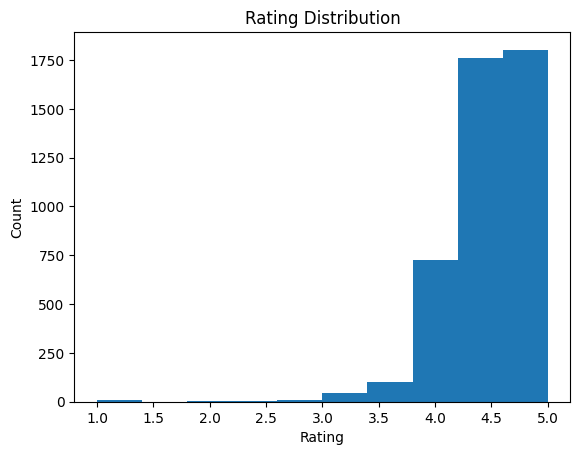

In [21]:
plt.hist(d2['Rating'], bins=10)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Rating Distribution")
plt.show()

**3. Which authors have the highest-rated books?**





In [22]:
d2[['Author', 'Rating']].sort_values(by='Rating', ascending=False).head(10)

,Author,Rating
4407,Meera Syal,5.0
4401,Macye Lavinder Maher,5.0
1024,Audible Inc.,5.0
4356,KC Dyer,5.0
3706,Maurice Isserman,5.0
3700,Shobha Viswanath,5.0
1053,Dennis Clark,5.0
12,Neil Gaiman,5.0
4453,Holly Newson,5.0
2934,Roald Dahl,5.0


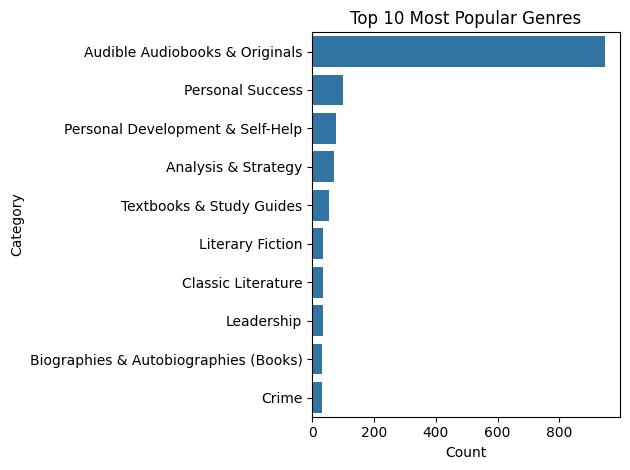

In [23]:
top_10_categories = d2['Category'].value_counts().head(10).index

# Create a countplot for the top 10 categories
sns.countplot(data=d2, y='Category', order=top_10_categories)
plt.title('Top 10 Most Popular Genres')
plt.xlabel('Count')
plt.ylabel('Category')
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

**4. What is the average rating distribution across books?**

In [24]:
average_rating_d1 = d1['Rating'].mean()
average_rating_d1

np.float64(4.40060466187328)

<Axes: xlabel='Rating', ylabel='Count'>

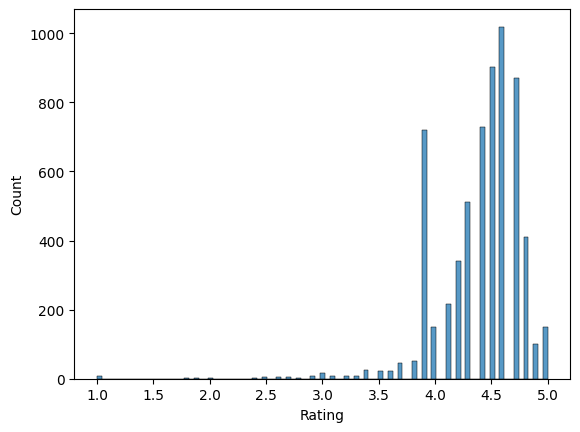

In [25]:
sns.histplot(x='Rating', data=d1)

**5.Bar charts for popular genres**

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Audible Audiobooks & Originals'),
  Text(1, 0, 'Personal Success'),
  Text(2, 0, 'Personal Development & Self-Help'),
  Text(3, 0, 'Analysis & Strategy'),
  Text(4, 0, 'Textbooks & Study Guides'),
  Text(5, 0, 'Literary Fiction'),
  Text(6, 0, 'Classic Literature'),
  Text(7, 0, 'Leadership'),
  Text(8, 0, 'Biographies & Autobiographies (Books)'),
  Text(9, 0, 'Crime')])

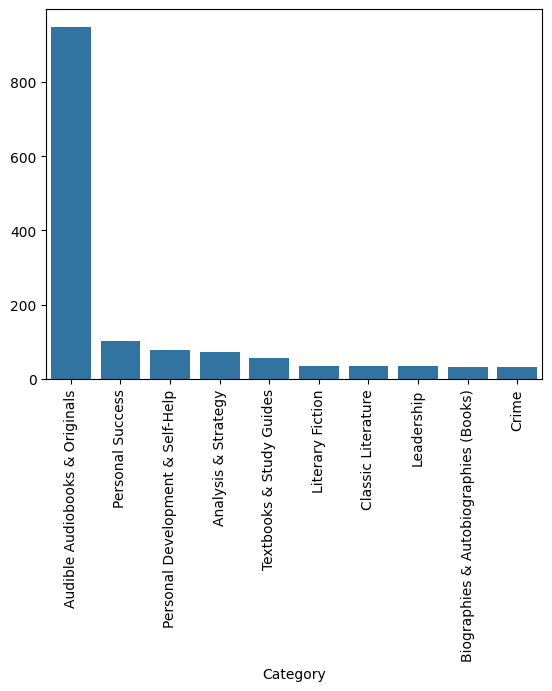

In [26]:
sns.barplot(x=d2['Category'].value_counts().head(10).index, y=d2['Category'].value_counts().head(10).values)
plt.xticks(rotation=90)
#plt.tight_layout()

**6.Reviews vs Ratings Relationship**

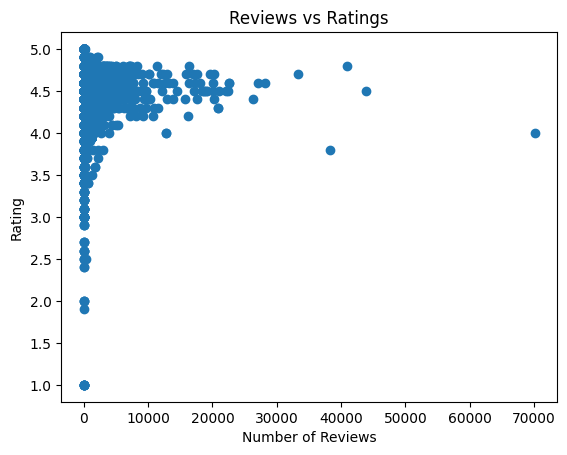

In [27]:
plt.scatter(d2['Number of Reviews'], d2['Rating'])
plt.xlabel("Number of Reviews")
plt.ylabel("Rating")
plt.title("Reviews vs Ratings")
plt.show()

<Axes: >

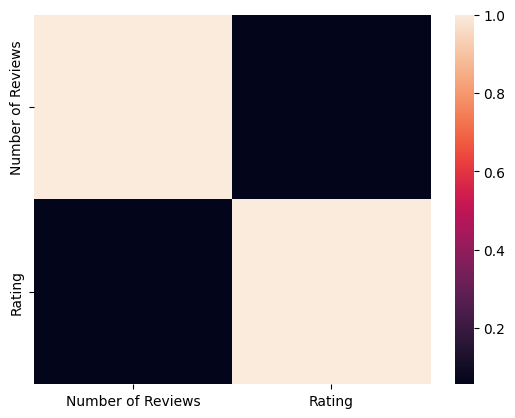

In [28]:
sns.heatmap(d2[['Number of Reviews', 'Rating']].corr())

# Task
Develop a book recommendation system using the provided datasets `d1` from "/content/drive/MyDrive/Audible_Catlog.xlsx" and `d2` from "/content/drive/MyDrive/Audible_Catlog_Advanced_Features.xlsx". The system should merge these DataFrames, process the 'Listening Time' column, combine relevant text features like 'Book Name', 'Author', 'Description', and 'Category', vectorize these combined features, calculate cosine similarity between books, and implement a function to recommend the top N most similar books based on a given book title. Finally, provide a summary of the developed system.

## Merge DataFrames

### Subtask:
Merge the `d1` and `d2` DataFrames based on common columns like 'Book Name' and 'Author' to create a comprehensive dataset for the recommendation system.


**Reasoning**:
To merge the `d1` and `d2` DataFrames, I will use the `pd.merge()` function, specifying 'Book Name' and 'Author' as the common keys and 'inner' as the merge type to create a comprehensive dataset.



In [29]:
df_merged = pd.merge(d1, d2, on=['Book Name', 'Author'], how='inner')
df_merged.head()

,Book Name,Author,Rating_x,Number of Reviews_x,Price_x,Rating_y,Number of Reviews_y,Price_y,Description,Listening Time,Ranks and Genre,Rank,Category,Free_or_Paid,Platform
0,Think Like a Monk: The Secret of How to Harnes...,Jay Shetty,4.9,313.0,10080.0,4.9,371.0,10080,"Over the past three years, Jay Shetty has beco...",10 hours and 54 minutes,",#1 in Audible Audiobooks & Originals (See Top...",None,Audible Audiobooks & Originals,Paid,Audible Audiobooks & Originals
1,Ikigai: The Japanese Secret to a Long and Happ...,Héctor García,4.6,3658.0,615.0,4.6,3682.0,615,Brought to you by Penguin.,3 hours and 23 minutes,",#2 in Audible Audiobooks & Originals (See Top...",None,Personal Success,Paid,Audible Audiobooks & Originals
2,The Subtle Art of Not Giving a F*ck: A Counter...,Mark Manson,4.4,20174.0,10378.0,4.4,20306.0,10378,"In this generation-defining self-help guide, a...",5 hours and 17 minutes,",#3 in Audible Audiobooks & Originals (See Top...",None,Stress Management,Paid,Audible Audiobooks & Originals
3,Atomic Habits: An Easy and Proven Way to Build...,James Clear,4.6,4614.0,888.0,4.6,4678.0,888,Brought to you by Penguin.,5 hours and 35 minutes,",#5 in Audible Audiobooks & Originals (See Top...",None,Society & Culture (Books),Paid,Audible Audiobooks & Originals
4,Life's Amazing Secrets: How to Find Balance an...,Gaur Gopal Das,4.6,4302.0,1005.0,4.6,4308.0,1005,"Stop going through life, Start growing throug...",6 hours and 25 minutes,",#6 in Audible Audiobooks & Originals (See Top...",None,Audible Audiobooks & Originals,Paid,Audible Audiobooks & Originals


**Reasoning**:
After merging the two DataFrames, there are duplicate columns (e.g., 'Rating_x', 'Rating_y') due to overlapping information. To create a clean and comprehensive dataset, I will drop the redundant columns from the first DataFrame (`_x` suffix) and rename the columns from the second DataFrame (`_y` suffix) to their original names, as `d2` represents 'Advanced Features' and is likely more relevant for these fields.



In [30]:
df_merged.drop(columns=['Rating_x', 'Number of Reviews_x', 'Price_x'], inplace=True)
df_merged.rename(columns={'Rating_y': 'Rating', 'Number of Reviews_y': 'Number of Reviews', 'Price_y': 'Price'}, inplace=True)
df_merged.head()

,Book Name,Author,Rating,Number of Reviews,Price,Description,Listening Time,Ranks and Genre,Rank,Category,Free_or_Paid,Platform
0,Think Like a Monk: The Secret of How to Harnes...,Jay Shetty,4.9,371.0,10080,"Over the past three years, Jay Shetty has beco...",10 hours and 54 minutes,",#1 in Audible Audiobooks & Originals (See Top...",None,Audible Audiobooks & Originals,Paid,Audible Audiobooks & Originals
1,Ikigai: The Japanese Secret to a Long and Happ...,Héctor García,4.6,3682.0,615,Brought to you by Penguin.,3 hours and 23 minutes,",#2 in Audible Audiobooks & Originals (See Top...",None,Personal Success,Paid,Audible Audiobooks & Originals
2,The Subtle Art of Not Giving a F*ck: A Counter...,Mark Manson,4.4,20306.0,10378,"In this generation-defining self-help guide, a...",5 hours and 17 minutes,",#3 in Audible Audiobooks & Originals (See Top...",None,Stress Management,Paid,Audible Audiobooks & Originals
3,Atomic Habits: An Easy and Proven Way to Build...,James Clear,4.6,4678.0,888,Brought to you by Penguin.,5 hours and 35 minutes,",#5 in Audible Audiobooks & Originals (See Top...",None,Society & Culture (Books),Paid,Audible Audiobooks & Originals
4,Life's Amazing Secrets: How to Find Balance an...,Gaur Gopal Das,4.6,4308.0,1005,"Stop going through life, Start growing throug...",6 hours and 25 minutes,",#6 in Audible Audiobooks & Originals (See Top...",None,Audible Audiobooks & Originals,Paid,Audible Audiobooks & Originals


**Reasoning**:
The next step is to process the 'Listening Time' column to convert its string format into a numerical representation (total minutes), which is crucial for building a recommendation system. This involves extracting hours and minutes from the string and calculating the total listening time in minutes.



In [31]:
def parse_listening_time(time_str):
    if pd.isna(time_str): # Handle NaN values if any slipped through
        return 0
    time_str = str(time_str).lower() # Convert to string and lowercase for consistent parsing

    hours = 0
    minutes = 0

    # Extract hours
    hour_match = re.search(r'(\d+)\s+hour', time_str)
    if hour_match:
        hours = int(hour_match.group(1))

    # Extract minutes
    minute_match = re.search(r'(\d+)\s+minute', time_str)
    if minute_match:
        minutes = int(minute_match.group(1))

    return hours * 60 + minutes

df_merged['Listening Time (minutes)'] = df_merged['Listening Time'].apply(parse_listening_time)
df_merged[['Listening Time', 'Listening Time (minutes)']].head()

,Listening Time,Listening Time (minutes)
0,10 hours and 54 minutes,654
1,3 hours and 23 minutes,203
2,5 hours and 17 minutes,317
3,5 hours and 35 minutes,335
4,6 hours and 25 minutes,385


## Combine Text Features

### Subtask:
Combine relevant text-based features such as 'Book Name', 'Author', 'Description', and 'Category' into a single string column for each book. This combined text will be used for content-based recommendations.


**Reasoning**:
To ensure that all text features are properly combined without encountering `NaN` values, I will fill any missing values in the specified columns ('Book Name', 'Author', 'Description', 'Category') with an empty string.



In [32]:
df_merged['Book Name'].fillna('', inplace=True)
df_merged['Author'].fillna('', inplace=True)
df_merged['Description'].fillna('', inplace=True)
df_merged['Category'].fillna('', inplace=True)

**Reasoning**:
Now that missing values have been handled, I will create a new column 'combined_features' by concatenating 'Book Name', 'Author', 'Description', and 'Category' columns, separated by spaces, to aggregate all relevant text information for each book.



In [33]:
df_merged['combined_features'] = df_merged['Book Name'] + ' ' + df_merged['Author'] + ' ' + df_merged['Description'] + ' ' + df_merged['Category']
df_merged[['Book Name', 'Author', 'Description', 'Category', 'combined_features']].head()

TypeError: unsupported operand type(s) for +: 'int' and 'str'

**Reasoning**:
The previous code failed because some columns involved in the concatenation might still contain non-string types, even after filling NaN values. To resolve the `TypeError`, I will explicitly convert all relevant columns ('Book Name', 'Author', 'Description', 'Category') to string type before concatenating them.



In [ ]:
df_merged['combined_features'] = df_merged['Book Name'].astype(str) + ' ' + df_merged['Author'].astype(str) + ' ' + df_merged['Description'].astype(str) + ' ' + df_merged['Category'].astype(str)
df_merged[['Book Name', 'Author', 'Description', 'Category', 'combined_features']].head()

,Book Name,Author,Description,Category,combined_features
0,Think Like a Monk: The Secret of How to Harnes...,Jay Shetty,"Over the past three years, Jay Shetty has beco...",Audible Audiobooks & Originals,Think Like a Monk: The Secret of How to Harnes...
1,Ikigai: The Japanese Secret to a Long and Happ...,Héctor García,Brought to you by Penguin.,Personal Success,Ikigai: The Japanese Secret to a Long and Happ...
2,The Subtle Art of Not Giving a F*ck: A Counter...,Mark Manson,"In this generation-defining self-help guide, a...",Stress Management,The Subtle Art of Not Giving a F*ck: A Counter...
3,Atomic Habits: An Easy and Proven Way to Build...,James Clear,Brought to you by Penguin.,Society & Culture (Books),Atomic Habits: An Easy and Proven Way to Build...
4,Life's Amazing Secrets: How to Find Balance an...,Gaur Gopal Das,"Stop going through life, Start growing throug...",Audible Audiobooks & Originals,Life's Amazing Secrets: How to Find Balance an...


## Vectorize Text Features

### Subtask:
Apply a text vectorization technique (e.g., TF-IDF Vectorizer) to convert the combined text features into numerical vectors. This step is crucial for calculating text similarity between books.


**Reasoning**:
To convert the combined text features into numerical vectors for similarity calculation, I need to import `TfidfVectorizer` from `sklearn.feature_extraction.text`, instantiate it, and then fit and transform the 'combined_features' column of the `df_merged` DataFrame.



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df_merged['combined_features'])
print(f"TF-IDF matrix shape: {tfidf_matrix.shape}")

TF-IDF matrix shape: (4251, 16968)


## Calculate Cosine Similarity

### Subtask:
Compute the cosine similarity matrix between all books based on their vectorized text features. This matrix will quantify how similar each book is to every other book.


**Reasoning**:
To calculate the cosine similarity matrix, I will import the `cosine_similarity` function from `sklearn.metrics.pairwise`, then apply it to the `tfidf_matrix` that was generated in the previous step, and finally print the shape of the resulting matrix to confirm its dimensions.



In [34]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(tfidf_matrix)
print(f"Cosine similarity matrix shape: {cosine_sim.shape}")

NameError: name 'tfidf_matrix' is not defined

## Develop Recommendation Function

### Subtask:
Create a function that takes a book title as input, finds its index in the dataset, retrieves its similarity scores from the cosine similarity matrix, and returns a list of the top N most similar books as recommendations.


**Reasoning**:
To efficiently retrieve book recommendations, I need to create a mapping from book titles to their corresponding indices in the `df_merged` DataFrame. This will allow for quick lookups when a user provides a book title for recommendations.



In [ ]:
indices = pd.Series(df_merged.index, index=df_merged['Book Name']).drop_duplicates()
print("Created indices Series mapping book names to DataFrame indices.")

Created indices Series mapping book names to DataFrame indices.


**Reasoning**:
To implement the recommendation function, I will define `get_recommendations` which will take a book title, find its index, retrieve similarity scores from the `cosine_sim` matrix, sort them, and return the top N recommended book titles, excluding the input book itself.



In [ ]:
def get_recommendations(book_title, n_recommendations=5):
    if book_title not in indices:
        print(f"Book '{book_title}' not found in the dataset.")
        return []

    idx = indices[book_title]

    # Handle cases where multiple books have the same name but different indices (e.g., duplicates)
    if isinstance(idx, pd.Series):
        idx = idx.iloc[0] # Take the first index if multiple are found

    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the N most similar books, excluding the book itself
    sim_scores = sim_scores[1:n_recommendations+1]

    book_indices = [i[0] for i in sim_scores]
    recommended_books = df_merged['Book Name'].iloc[book_indices].tolist()

    return recommended_books

print("Recommendation function 'get_recommendations' defined.")

Recommendation function 'get_recommendations' defined.


**Reasoning**:
To demonstrate the functionality of the `get_recommendations` function, I will call it with an example book title and print the recommended books.



In [ ]:
example_book_title = 'Atomic Habits: An Easy and Proven Way to Build Good Habits and Break Bad Ones'
recommendations = get_recommendations(example_book_title, n_recommendations=5)

print(f"Recommendations for '{example_book_title}':")
for i, book in enumerate(recommendations):
    print(f"{i+1}. {book}")

Recommendations for 'Atomic Habits: An Easy and Proven Way to Build Good Habits and Break Bad Ones':
1. Indistractable: How to Control Your Attention and Choose Your Life
2. High Performance Habits: How Extraordinary People Become That Way
3. Tiny Habits: The Small Changes That Change Everything
4. Change Your Habits, Change Your Life: Strategies That Transformed 177 Average People into Self-Made Millionaires
5. The 7 Habits Foundational Principles
